In [2]:
import glob
import requests
from lxml import etree
import re
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import json
import copy
import sys
import seaborn as sns
import math
import scipy.stats as stats
import statistics as ss
import time
import seaborn as sns
import statsmodels.formula.api as smf
from collections import defaultdict

from bs4 import BeautifulSoup

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


## caculate the percentage of news sources in references on the pages

In [61]:
df2 = pd.read_csv('.../referNewsWeb_updated.csv')

In [62]:
len(df2)

51705

In [67]:
#df2.head()

In [64]:
dfScores = pd.read_csv('.../bias_scores.csv')

In [65]:
#  media outlets that have a ideological score 
len(dfScores)

19022

In [68]:
# get the the number of references from sources with known ideologcial leanings 
dfNews = df2[df2['urlSourceUpdated'].isin(dfScores['domain'])]

In [70]:
len(dfNews)

43613

In [71]:
# news sources take up 71.67% of all citations 
43613 / 60851

0.7167178846691098

### create a file for source count

In [72]:
# get the sites that are not missing
sites = list(df2[df2['urlSourceUpdated'] != 'notFound']['urlSourceUpdated'])

In [76]:
sourceCount = Counter(sites).most_common()

In [77]:
sourceCount[:5]

[('house.gov', 3454),
 ('nytimes.com', 3075),
 ('washingtonpost.com', 2236),
 ('thehill.com', 2034),
 ('politico.com', 1741)]

In [78]:
len(sourceCount)

2572

In [79]:
source = [i[0] for i in sourceCount]

In [80]:
count = [i[1] for i in sourceCount]

In [81]:
sourceDict = {'source': source, 'count': count}

In [83]:
dfCount = pd.DataFrame(sourceDict)

In [84]:
# count/sum
decimal = []
allCount = sum(list(dfCount['count']))
for i in list(dfCount['count']):
    quotient = round(i/allCount, 4) # len(source1) is 9304
    decimal.append(quotient)

In [85]:
# creat a new column
dfCount['count/sum'] = decimal

In [86]:
percent = []
for i in decimal:
    per = "{:.2%}".format(i) # save the number with two decimal places
    percent.append(per)

In [87]:
dfCount['percent'] = percent

In [88]:
dfCount.iloc[:5]

,source,count,count/sum,percent
0,house.gov,3454,0.0675,6.75%
1,nytimes.com,3075,0.0601,6.01%
2,washingtonpost.com,2236,0.0437,4.37%
3,thehill.com,2034,0.0398,3.98%
4,politico.com,1741,0.0340,3.40%


### identify news outlest with known political leanings

In [94]:
# return 999 if the key does not exist 
def returnNull():
    return(999)

# Create a defaultdict
mediaScore = defaultdict(returnNull)

# Add keys and values to the defaultdict
for k, v in zip(dfScores['domain'], dfScores['score']):
    mediaScore[k] = v

In [95]:
# get the bias scores based on domains
scoreList = []
for domain in dfCount['source']: 
    v = mediaScore[domain]
    scoreList.append(v)

In [96]:
dfCount['biaScore'] = scoreList

In [97]:
# 1167 media outlets have unidentified political leanings 
len(dfCount[dfCount['biaScore'] == 999])

1167

In [98]:
dfCountValid = dfCount[dfCount['biaScore'] != 999]

In [99]:
dfCountValid.iloc[:5]

,source,count,count/sum,percent,biaScore
0,house.gov,3454,0.0675,6.75%,-0.4210
1,nytimes.com,3075,0.0601,6.01%,-0.2602
2,washingtonpost.com,2236,0.0437,4.37%,-0.2342
3,thehill.com,2034,0.0398,3.98%,-0.0600
4,politico.com,1741,0.0340,3.40%,-0.1914


In [101]:
dfNewSort = dfCountValid.sort_values('biaScore', ascending = True)

In [102]:
dfNewSort.reset_index(drop = True, inplace = True)

In [103]:
len(dfNewSort)

1405

In [107]:
# the number of conservative outlets
len(dfNewSort[dfNewSort['biaScore'] > 0])

681

In [108]:
# the number of liberal outlets
len(dfNewSort[dfNewSort['biaScore'] < 0])

724

### plot a scatter plot

In [112]:
df = pd.read_csv('.../categoryCountUpdated4.csv')

In [113]:
dfNews = pd.read_csv('.../referNewsWebUpdatedIdentified_updated.csv')

In [114]:
# count the references
dfNewsIde = dfNews.groupby('name')['name'].count().to_frame()

In [115]:
dfNewsIde.rename(columns = {'name': 'newsPoliCount'}, inplace= True)

In [116]:
dfNewsIde.reset_index(inplace = True)

In [120]:
dfNewsIde.head()

,name,newsPoliCountUpdated2
0,Aaron_Bean,7
1,Aaron_Schock,134
2,Abby_Finkenauer,21
3,Abigail_Spanberger,47
4,Adam_Kinzinger,92


In [118]:
dfNewsIde.rename(columns = {'newsPoliCount': 'newsPoliCountUpdated2'}, inplace= True)

In [121]:
dfTotal = pd.merge(df, dfNewsIde, on = 'name')

In [122]:
dfTotal.head()

,name,totalCount,newsCount,webCount,bookCount,newsgroupCount,magazineCount,journalCount,interviewCount,conferenceCount,...,thesisCount,speechCount,episodeCount,mediaCount,mediaNoCount,checkCount,newsWebCount,newsPoliCount,newsPoliUpdate,newsPoliCountUpdated2
0,Chuck_Grassley,173,82,86,2,0,1,0,0,0,...,0,0,0,0,0,172,163,90.0,90.0,147
1,Mitch_McConnell,245,130,80,26,0,5,4,0,0,...,0,0,0,0,0,245,198,146.0,146.0,182
2,Dianne_Feinstein,145,84,54,4,0,2,0,0,0,...,0,0,0,1,0,144,126,59.0,59.0,113
3,Patty_Murray,76,36,35,1,0,2,1,0,0,...,0,0,0,0,0,76,56,21.0,21.0,54
4,Ron_Wyden,161,87,71,0,0,3,0,0,0,...,0,0,0,0,0,161,142,75.0,75.0,132


In [124]:
# get the percent of news citations (from outlets with known poli leanings) for individual pages
percentIde = dfTotal['newsPoliCountUpdated2'].values / dfTotal['totalCount'].values

In [125]:
# # round to two decimal places
percentIde2 = [round(i, 2) for i in percentIde]

In [126]:
# create a new column
dfTotal['percentNewsIde'] = percentIde2

In [55]:
#df[df['percentNewsIde'] == 1]

In [127]:
# create a new dataframe
dfPlot = dfTotal[['name', 'totalCount', 'newsPoliCountUpdated2','percentNewsIde']]

In [128]:
dfPlot.head()

,name,totalCount,newsPoliCountUpdated2,percentNewsIde
0,Chuck_Grassley,173,147,0.85
1,Mitch_McConnell,245,182,0.74
2,Dianne_Feinstein,145,113,0.78
3,Patty_Murray,76,54,0.71
4,Ron_Wyden,161,132,0.82


In [130]:
# the average percent of news sources (with known poli leanings) in references
sum(dfTotal['percentNewsIde']) / len(dfPlot)

0.6831085714285715

In [131]:
dfMembers = pd.read_csv('.../congressMembersUrlUpdated4.csv')

In [134]:
dfMembers['party'].drop_duplicates()

0      Republican
2      Democratic
19    Independent
Name: party, dtype: object

In [136]:
dfMem = dfMembers[['newNames', 'party']]

In [137]:
dfMem.head()

,newNames,party
0,Chuck_Grassley,Republican
1,Mitch_McConnell,Republican
2,Dianne_Feinstein,Democratic
3,Patty_Murray,Democratic
4,Ron_Wyden,Democratic


In [138]:
# merge two datasets on the column of names
dfRev = pd.merge(dfMem, dfPlot, left_on = 'newNames', right_on = 'name').drop('newNames', axis = 1)

In [139]:
dfRev.head()

,party,name,totalCount,newsPoliCountUpdated2,percentNewsIde
0,Republican,Chuck_Grassley,173,147,0.85
1,Republican,Mitch_McConnell,245,182,0.74
2,Democratic,Dianne_Feinstein,145,113,0.78
3,Democratic,Patty_Murray,76,54,0.71
4,Democratic,Ron_Wyden,161,132,0.82


In [142]:
dfRep = dfRev[dfRev['party'] == 'Republican']
dfLib = dfRev[dfRev['party'] == 'Democratic']
#dfInd = dfRev[dfRev['party'] == 'Independent']

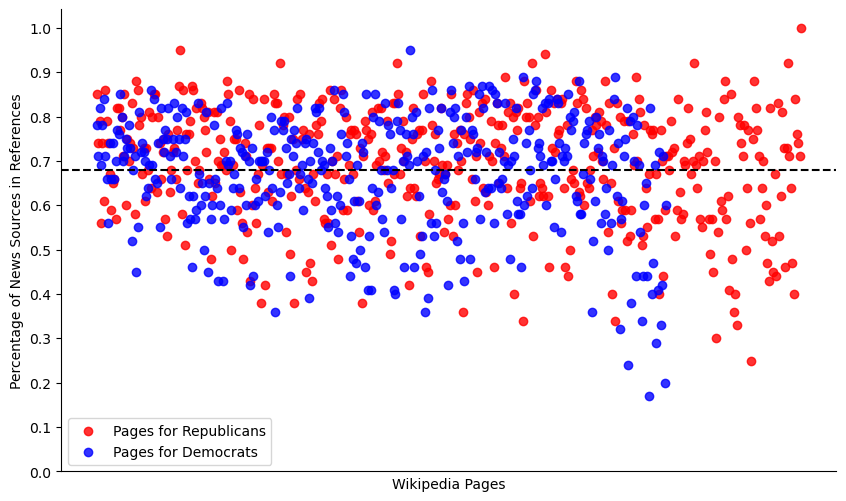

In [144]:
# add a legend

fig, ax = plt.subplots(figsize = (10, 6))
#y = dfRev['percentNewsIde']
#x = range(len(y))

#colors = np.random.rand(532)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#plt.scatter(range(len(dfLib)), dfLib['percentNewsIde'],  c = 'blue', label = 'Pages for Democrats', alpha = 0.8)  
plt.scatter(range(len(dfRep)), dfRep['percentNewsIde'], c = 'red', label = 'Pages for Republicans', alpha = 0.8)   
plt.scatter(range(len(dfLib)), dfLib['percentNewsIde'],  c = 'blue', label = 'Pages for Democrats', alpha = 0.8)   
#plt.scatter(range(len(dfInd)), dfInd['percentNewsIde'], c = 'purple',label = 'Pages for Independents', alpha = 0.8)   

plt.legend(loc='lower left')

plt.xticks([])
plt.yticks(np.arange(0,1.1,0.1))
plt.xlabel('Wikipedia Pages')
plt.ylabel('Percentage of News Sources in References')
plt.axhline(0.68, linestyle = '--', color = 'k')
#plt.savefig('.../scatterRevelanceNews_updated.pdf', bbox_inches = 'tight')
plt.show()

## caculate the frequency of liberal and conservative news sources on the pages

### perform a t test

In [145]:
dfTable2 = pd.read_csv('.../tTestTable.csv')

In [146]:
dfTable2.head()

,name,blue,red
0,Aaron_Bean,1,6
1,Aaron_Schock,100,34
2,Abby_Finkenauer,11,10
3,Abigail_Spanberger,39,8
4,Adam_Kinzinger,83,9


In [149]:
dfTable2 = dfTable2[dfTable2['name'].isin(dfMembers['newNames'])]

In [150]:
len(dfTable2)

875

In [151]:
dfTable2['blue'].sum()

33846

In [152]:
dfTable2['red'].sum()

9767

In [153]:
# independent t test
stats.ttest_ind(dfTable2['blue'], 
                dfTable2['red'])

TtestResult(statistic=18.64230446828503, pvalue=6.9003567495151004e-71, df=1748.0)

In [154]:
# welch t test
stats.ttest_ind(dfTable2['blue'], dfTable2['red'], equal_var = False)

TtestResult(statistic=18.64230446828503, pvalue=1.754529662017703e-67, df=1082.375358403943)

In [155]:
sampling_difference = dfTable2['blue'].values - \
                     dfTable2['red'].values

stats.shapiro(sampling_difference)
#Unfortunately, the output is not labelled but is in the format of (W test statistic, p-value). 
# The test is not significant which indicates the sampling distribution is normally distributed.

ShapiroResult(statistic=0.7553125619888306, pvalue=4.623322137539754e-34)

In [156]:
stats.levene(dfTable2['blue'],
             dfTable2['red'],
             center= 'mean')

LeveneResult(statistic=253.7166053261225, pvalue=1.9177138857007143e-53)

### plot a stacked bar plot

In [8]:
dfMem = dfMembers[['newNames', 'jobTitles', 'party']]

In [9]:
# merge two datasets
dfTable3 = pd.merge(dfMem, dfTable2, left_on= 'newNames', right_on = 'name', how = 'inner' )

In [10]:
len(dfTable3)

875

In [11]:
# remove independents; note that I skipped dfTable4
dfTable5 = dfTable3[dfTable3['party'] != 'Independent'].reset_index(drop = True)

In [12]:
len(dfTable5)

872

In [13]:
# assign values 
def assignValue(df):
    if df['party'] == 'Democratic' and df['jobTitles'] == 'represent':
        return 0  # assign 0 to reprsentatives among democrats
    elif df['party'] == 'Democratic' and df['jobTitles'] == 'senator':
        return 1  # assign 1 to senator among democrats
    elif df['party'] == 'Republican' and df['jobTitles'] == 'represent':
        return 2 # assign 2 to representatives among republicans
    elif df['party'] == 'Republican' and df['jobTitles'] == 'senator':
        return 3  # assign 3 to senators among republicans 

# apply function to each row axis = 1
dfTable5['plotCategory'] = dfTable5.apply(assignValue, axis = 1)

In [14]:
dfTable6 = dfTable5.sort_values('plotCategory').reset_index(drop = True)

In [15]:
dfTable6['sumBlueRed'] = dfTable6['blue'] + dfTable6['red']

In [17]:
# I annotated the figure with texts based on the data below
dfTable6.sort_values('sumBlueRed', ascending = False)[:10]

,newNames,jobTitles,party,name,blue,red,plotCategory,sumBlueRed
814,Mitt_Romney,senator,Republican,Mitt_Romney,347,74,3,421
465,Marjorie_Taylor_Greene,represent,Republican,Marjorie_Taylor_Greene,295,53,2,348
811,Ted_Cruz,senator,Republican,Ted_Cruz,267,60,3,327
341,Kamala_Harris,senator,Democratic,Kamala_Harris,253,41,1,294
829,Rand_Paul,senator,Republican,Rand_Paul,208,82,3,290
42,Alexandria_Ocasio-Cortez,represent,Democratic,Alexandria_Ocasio-Cortez,245,43,0,288
229,Nancy_Pelosi,represent,Democratic,Nancy_Pelosi,232,45,0,277
737,Ron_DeSantis,represent,Republican,Ron_DeSantis,133,122,2,255
446,Matt_Gaetz,represent,Republican,Matt_Gaetz,199,50,2,249
853,Jeff_Sessions,senator,Republican,Jeff_Sessions,215,31,3,246


In [173]:
len(dfTable6[dfTable6['plotCategory'] == 0])

330

In [174]:
len(dfTable6[dfTable6['plotCategory'] == 1])

60

In [175]:
len(dfTable6[dfTable6['plotCategory'] == 2])

405

In [176]:
len(dfTable6[dfTable6['plotCategory'] == 3])

77

In [177]:
330+60+405+77 

872

In [ ]:
# 330 reprsent democrats
# 60 senator democrats
# 405 represent republican
# 77 senator republican 
#dfTable6[dfTable6['plotCategory'] == 3]

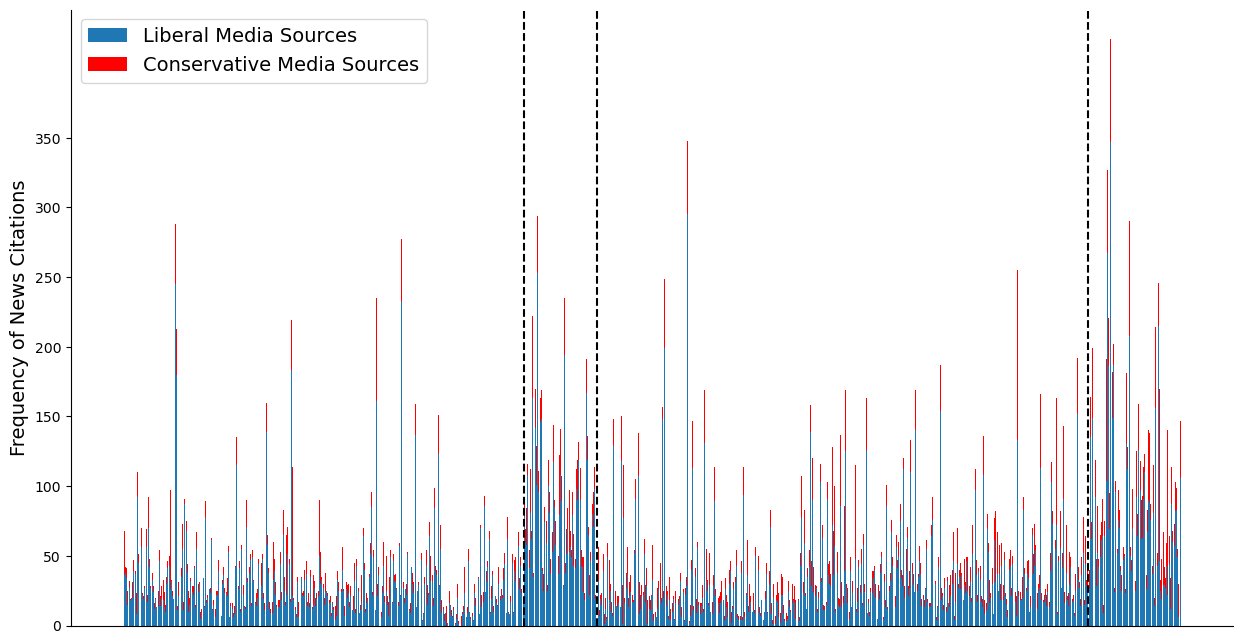

In [178]:
# democrats on the left; republicans on the right
fig, ax = plt.subplots(figsize = (15, 8))

names = list(dfTable6['newNames'])  
blueSources = list(dfTable6['blue'])
redSources = list(dfTable6['red'])

# Calculate the positions for the bars for both layers
x = np.arange(len(names))

# Create the first layer of bars
plt.bar(x, blueSources, label= 'Liberal Media Sources') #  color = 'blue'
# Create the second layer of bars on top of the first layer
plt.bar(x, redSources, bottom= blueSources, label='Conservative Media Sources', color = 'red')

# Add labels 
plt.xlabel('')
plt.ylabel('Frequency of News Citations', fontsize = 14)
# 0-334 reprsent democrats; 334-394 senator democrats; 394 -803; the rest senator republican 
ax.axvline(x=330, linestyle='--', color='k')
ax.axvline(x=390, linestyle='--', color='k')
ax.axvline(x=795, linestyle='--', color='k')

# add a legend
plt.legend(fontsize = 14)
# remove xticks 
plt.xticks([])
plt.yticks(np.arange(0,360,50))
#remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Show the plot or save it to a file
#plt.savefig('.../frequencyCitations4.pdf')
plt.show()

#### separate democrats and republicans 

##### pages for democrats

In [181]:
dfTable_dem = dfTable6[dfTable6['party'] == 'Democratic']

In [182]:
dfTable_dem.head()

,newNames,jobTitles,party,name,blue,red,plotCategory,sumBlueRed
0,Ann_Kirkpatrick,represent,Democratic,Ann_Kirkpatrick,36,32,0,68
1,Mikie_Sherrill,represent,Democratic,Mikie_Sherrill,38,4,0,42
2,Elissa_Slotkin,represent,Democratic,Elissa_Slotkin,34,7,0,41
3,Ted_Deutch,represent,Democratic,Ted_Deutch,15,10,0,25
4,John_Garamendi,represent,Democratic,John_Garamendi,27,5,0,32


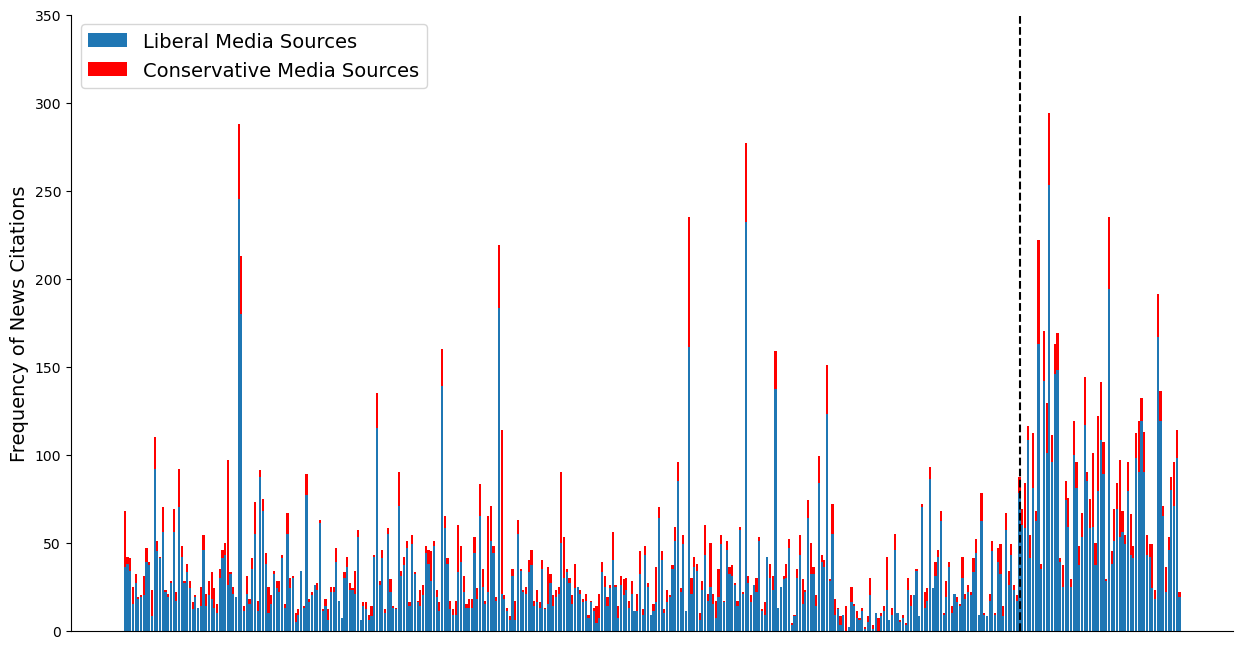

In [184]:
# democrats on the left; republicans on the right
fig, ax = plt.subplots(figsize = (15, 8))

names = list(dfTable_dem['newNames'])  
blueSources = list(dfTable_dem['blue'])
redSources = list(dfTable_dem['red'])

# Calculate the positions for the bars for both layers
x = np.arange(len(names))

# Create the first layer of bars
plt.bar(x, blueSources, label= 'Liberal Media Sources') #  color = 'blue'
# Create the second layer of bars on top of the first layer
plt.bar(x, redSources, bottom= blueSources, label='Conservative Media Sources', color = 'red')

# Add labels 
plt.xlabel('')
plt.ylabel('Frequency of News Citations', fontsize = 14)
# 0-334 reprsent democrats; 334-394 senator democrats; 394 -803; the rest senator republican 
ax.axvline(x=330, linestyle='--', color='k')
#ax.axvline(x=390, linestyle='--', color='k')
#ax.axvline(x=795, linestyle='--', color='k')

# add a legend
plt.legend(fontsize = 14)
# remove xticks 
plt.xticks([])
plt.yticks(np.arange(0,360,50))
#remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Show the plot or save it to a file
#plt.savefig('.../frequencyCitations_dem.pdf')
plt.show()

##### pages for republicans

In [185]:
dfTable_rep = dfTable6[dfTable6['party'] == 'Republican']

In [187]:
len(dfTable_rep)

482

In [186]:
dfTable_rep.head()

,newNames,jobTitles,party,name,blue,red,plotCategory,sumBlueRed
390,Mary_Miller,represent,Republican,Mary_Miller,48,13,2,61
391,Debbie_Lesko,represent,Republican,Debbie_Lesko,32,24,2,56
392,Cory_Mills,represent,Republican,Cory_Mills,7,4,2,11
393,Max_Miller,represent,Republican,Max_Miller,19,3,2,22
394,Mariannette_Miller-Meeks,represent,Republican,Mariannette_Miller-Meeks,15,8,2,23


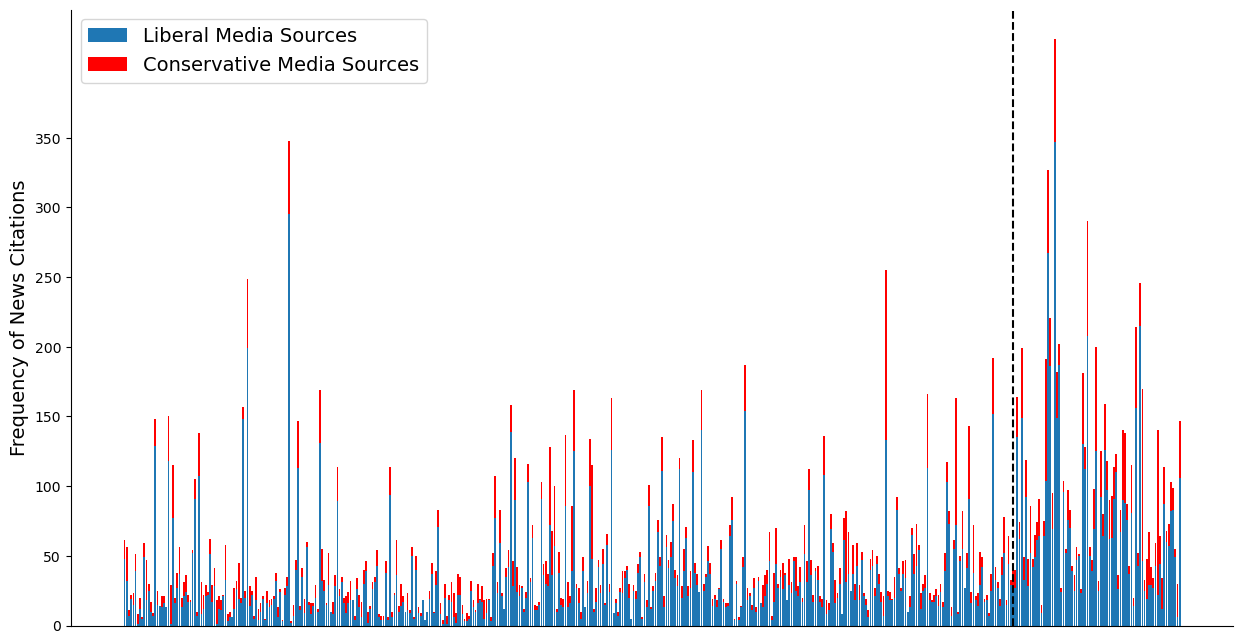

In [189]:
# democrats on the left; republicans on the right
fig, ax = plt.subplots(figsize = (15, 8))

names = list(dfTable_rep['newNames'])  
blueSources = list(dfTable_rep['blue'])
redSources = list(dfTable_rep['red'])

# Calculate the positions for the bars for both layers
x = np.arange(len(names))

# Create the first layer of bars
plt.bar(x, blueSources, label= 'Liberal Media Sources') #  color = 'blue'
# Create the second layer of bars on top of the first layer
plt.bar(x, redSources, bottom= blueSources, label='Conservative Media Sources', color = 'red')

# Add labels 
plt.xlabel('')
plt.ylabel('Frequency of News Citations', fontsize = 14)
# 0-334 reprsent democrats; 334-394 senator democrats; 394 -803; the rest senator republican 
ax.axvline(x=405, linestyle='--', color='k')
#ax.axvline(x=390, linestyle='--', color='k')
#ax.axvline(x=795, linestyle='--', color='k')

# add a legend
plt.legend(fontsize = 14)
# remove xticks 
plt.xticks([])
plt.yticks(np.arange(0,360,50))
#remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Show the plot or save it to a file
#plt.savefig('.../frequencyCitations_rep.pdf')
plt.show()

## one sample t test

In [18]:
dfRegre = pd.read_csv('.../regressionTableUpdated2.csv')

In [19]:
dfRegre.head()

,newNames,biasWithoutSum,biasWithoutSum_zscore,partyDummy,genderDummy,jobDummy,age_zscore,monthlyEdit_zscore,pageviews,editors,...,outLink_zscore,inLink_zscore,unique_references_zscore,words_zscore,characters_zscore,editors_zscore,pageviews_zscore,gini_index,gini_zscore,wordHuman_zscore
0,Chuck_Grassley,-0.442177,0.292297,1,1,1,2.270586,0.576590,41643,939,...,1.487689,1.471997,1.591714,1.702650,1.760030,1.576381,1.275870,0.440365,-0.346172,-0.315371
1,Mitch_McConnell,-0.637363,-0.286548,1,1,1,1.560672,2.928292,49461,1937,...,2.506149,4.148224,2.433294,2.076332,2.149130,4.312472,1.589072,0.563755,1.359692,1.050987
2,Dianne_Feinstein,-0.592920,-0.154750,0,0,1,2.270586,0.937662,65884,1942,...,2.154956,2.759522,2.027532,1.653865,1.708176,4.326180,2.247004,0.508476,0.595465,0.786341
3,Patty_Murray,-0.814815,-0.812802,0,0,1,0.929637,-0.103632,19482,716,...,0.406015,1.099031,0.118950,0.554948,0.562194,0.965009,0.388064,0.422880,-0.587901,-0.159746
4,Ron_Wyden,-0.803030,-0.777854,0,1,1,1.008516,-0.140145,9819,655,...,1.115425,0.970080,1.396348,2.540543,2.540073,0.797773,0.000949,0.434123,-0.432461,-0.114248


In [20]:
# three independents are removed. 
len(dfRegre)

872

In [11]:
dfMembers.head()

,Unnamed: 0,names,urlTail,party,states,jobTitles,newNames,urlRefer,namesTalkPage
0,0,Chuck Grassley,/wiki/Chuck_Grassley,Republican,Iowa,senator,Chuck_Grassley,https://en.wikipedia.org/w/index.php?title=Chu...,Chuck_Grassley
1,1,Mitch McConnell,/wiki/Mitch_McConnell,Republican,Kentucky,senator,Mitch_McConnell,https://en.wikipedia.org/w/index.php?title=Mit...,Mitch_McConnell
2,2,Dianne Feinstein,/wiki/Dianne_Feinstein,Democratic,California,senator,Dianne_Feinstein,https://en.wikipedia.org/w/index.php?title=Dia...,Dianne_Feinstein
3,3,Patty Murray,/wiki/Patty_Murray,Democratic,Washington,senator,Patty_Murray,https://en.wikipedia.org/w/index.php?title=Pat...,Patty_Murray
4,4,Ron Wyden,/wiki/Ron_Wyden,Democratic,Oregon,senator,Ron_Wyden,https://en.wikipedia.org/w/index.php?title=Ron...,Ron_Wyden


In [25]:
# I checked that the regression table doesn't contain mulitple pages of the same politicisn
[i for i in list(dfRegre['newNames']) if i not in list(dfMembers['newNames'])]

[]

In [26]:
# I checked that the regression table doesn't contain mulitple pages of the same politicisn
[i for i in list(dfMembers['newNames']) if i not in list(dfRegre['newNames'])]

['Bernie_Sanders', 'Angus_King', 'Kyrsten_Sinema']

In [27]:
dfMembers[dfMembers['newNames'] == 'Angus_King']

,Unnamed: 0,names,urlTail,party,states,jobTitles,newNames,urlRefer,namesTalkPage
49,49,Angus King,/wiki/Angus_King,Independent,Maine,senator,Angus_King,https://en.wikipedia.org/w/index.php?title=Ang...,Angus_King


In [8]:
#dfRegre['biasWithoutSum'].describe()

In [12]:
biasList = list(dfRegre['biasWithoutSum'])

In [16]:
mean = ss.mean(biasList)

In [17]:
std = ss.stdev(biasList) 

In [18]:
print(mean, std)

-0.5399372669484336 0.33741956987666294


In [23]:
len(biasList)

872

In [13]:
population_mean = 0
t_statistic, p_value = stats.ttest_1samp(biasList, population_mean)

In [14]:
print(t_statistic, p_value)

-47.25320593013419 1.4365830890468737e-242


## regressions

In [3]:
dfRegre.drop('wordHuman_zscore', axis = 1, inplace = True)

In [4]:
dfRegre.head()

,newNames,biasWithoutSum,biasWithoutSum_zscore,partyDummy,genderDummy,jobDummy,age_zscore,monthlyEdit_zscore,pageviews,editors,...,assessValueDummy,outLink_zscore,inLink_zscore,unique_references_zscore,words_zscore,characters_zscore,editors_zscore,pageviews_zscore,gini_index,gini_zscore
0,Chuck_Grassley,-0.442177,0.292297,1,1,1,2.270586,0.576590,41643,939,...,0,1.487689,1.471997,1.591714,1.702650,1.760030,1.576381,1.275870,0.440365,-0.346172
1,Mitch_McConnell,-0.637363,-0.286548,1,1,1,1.560672,2.928292,49461,1937,...,1,2.506149,4.148224,2.433294,2.076332,2.149130,4.312472,1.589072,0.563755,1.359692
2,Dianne_Feinstein,-0.592920,-0.154750,0,0,1,2.270586,0.937662,65884,1942,...,1,2.154956,2.759522,2.027532,1.653865,1.708176,4.326180,2.247004,0.508476,0.595465
3,Patty_Murray,-0.814815,-0.812802,0,0,1,0.929637,-0.103632,19482,716,...,0,0.406015,1.099031,0.118950,0.554948,0.562194,0.965009,0.388064,0.422880,-0.587901
4,Ron_Wyden,-0.803030,-0.777854,0,1,1,1.008516,-0.140145,9819,655,...,1,1.115425,0.970080,1.396348,2.540543,2.540073,0.797773,0.000949,0.434123,-0.432461


In [5]:
dfRegre.columns

Index(['newNames', 'biasWithoutSum', 'biasWithoutSum_zscore', 'partyDummy',
       'genderDummy', 'jobDummy', 'age_zscore', 'monthlyEdit_zscore',
       'pageviews', 'editors', 'assessValue', 'characters', 'words',
       'unique_references', 'links_out_count', 'links_in_count',
       'assessValueDummy', 'outLink_zscore', 'inLink_zscore',
       'unique_references_zscore', 'words_zscore', 'characters_zscore',
       'editors_zscore', 'pageviews_zscore', 'gini_index', 'gini_zscore'],
      dtype='object')

In [6]:
dfTalkPage2 = pd.read_csv('.../talkPageMetricUpdated.csv')

In [7]:
dfTalkPage3 = dfTalkPage2[['newNames','namesTalkPage','wordHuman_zscore','wordHuBot_zscore',
                          'letHuman_zscore', 'letHuBot_zscore', 'editorCount_zscore', 'editorCountHu_zscore',
                          'letterCount_zscore', 'letNumCount_zscore', 'wordNumCount_zscore', 'wordCount_zscore',
                          'editCount_zscore', 'editCountHu_zscore']]

In [8]:
dfRegre2 = pd.merge(dfRegre, dfTalkPage3, on = 'newNames')

In [9]:
dfRegre2.head()

,newNames,biasWithoutSum,biasWithoutSum_zscore,partyDummy,genderDummy,jobDummy,age_zscore,monthlyEdit_zscore,pageviews,editors,...,letHuman_zscore,letHuBot_zscore,editorCount_zscore,editorCountHu_zscore,letterCount_zscore,letNumCount_zscore,wordNumCount_zscore,wordCount_zscore,editCount_zscore,editCountHu_zscore
0,Chuck_Grassley,-0.442177,0.292297,1,1,1,2.270586,0.576590,41643,939,...,-0.306705,-0.257957,0.954943,0.953339,0.253704,0.260843,0.252277,0.242173,0.288408,0.278914
1,Mitch_McConnell,-0.637363,-0.286548,1,1,1,1.560672,2.928292,49461,1937,...,0.128567,0.091552,2.418913,2.401592,1.651702,1.648654,1.595855,1.602110,1.166569,0.997998
2,Dianne_Feinstein,-0.592920,-0.154750,0,0,1,2.270586,0.937662,65884,1942,...,0.698165,0.798954,2.044665,2.033782,1.620953,1.620428,1.595622,1.599487,0.672494,0.615109
3,Patty_Murray,-0.814815,-0.812802,0,0,1,0.929637,-0.103632,19482,716,...,-0.174975,-0.106084,0.096374,0.091283,-0.021156,-0.022174,-0.018398,-0.016794,-0.022353,-0.021794
4,Ron_Wyden,-0.803030,-0.777854,0,1,1,1.008516,-0.140145,9819,655,...,-0.172582,-0.148138,0.140403,0.125765,-0.084176,-0.084844,-0.089801,-0.089286,-0.069491,-0.074091


In [10]:
dfRegre2.columns

Index(['newNames', 'biasWithoutSum', 'biasWithoutSum_zscore', 'partyDummy',
       'genderDummy', 'jobDummy', 'age_zscore', 'monthlyEdit_zscore',
       'pageviews', 'editors', 'assessValue', 'characters', 'words',
       'unique_references', 'links_out_count', 'links_in_count',
       'assessValueDummy', 'outLink_zscore', 'inLink_zscore',
       'unique_references_zscore', 'words_zscore', 'characters_zscore',
       'editors_zscore', 'pageviews_zscore', 'gini_index', 'gini_zscore',
       'namesTalkPage', 'wordHuman_zscore', 'wordHuBot_zscore',
       'letHuman_zscore', 'letHuBot_zscore', 'editorCount_zscore',
       'editorCountHu_zscore', 'letterCount_zscore', 'letNumCount_zscore',
       'wordNumCount_zscore', 'wordCount_zscore', 'editCount_zscore',
       'editCountHu_zscore'],
      dtype='object')

In [11]:
# the range of work diversity is [0,1]
# as the value grows, the inequality of workload distribution increases

# the range of work diversity is [-1, 0]
# as the value grows, the diversity of workload increases. (the inequality of workload distribution decreases)

# change the direction of work diversity 
giniList = [i * -1 for i in list(dfRegre2['gini_index'])]

In [12]:
# the differences with gini zscore due to the number of obervations 
# while calculating gini zscore, there were 875 units. But there are 872 in dfRegre
dfRegre2['gini_zscore_reverse'] = stats.zscore(giniList)

In [13]:
# specify the formula   DV ~ IV     the interaction term is not significant  main effects yes!
reg = "biasWithoutSum ~ monthlyEdit_zscore + wordHuman_zscore + gini_zscore_reverse + editors_zscore + C(assessValueDummy) + age_zscore  + unique_references_zscore + characters_zscore + pageviews_zscore + C(jobDummy) + C(partyDummy) + C(genderDummy)"

In [14]:
# fit the model
regOutput = smf.ols(reg, dfRegre2).fit()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [ ]:
# workload diversity :  gini_zscore_reverse
# communication intensity: wordHuman_zscore
# editors_zscore:  crowd size

In [15]:
print(regOutput.summary())

                            OLS Regression Results                            
Dep. Variable:         biasWithoutSum   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     7.989
Date:                Fri, 29 Sep 2023   Prob (F-statistic):           2.63e-14
Time:                        12:15:58   Log-Likelihood:                -243.32
No. Observations:                 872   AIC:                             512.6
Df Residuals:                     859   BIC:                             574.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

## plot coefficients

In [2]:
dfRegre2 = pd.read_csv('.../regressionTableUpdated3.csv')

In [3]:
# the range of gini index is [0,1]
# as the value grows, the inequality of wealth increases

# the range of work diversity is [0,1]
# as the value grows, the inequality of workload distribution increases

# the range of work diversity is [-1, 0]
# as the value grows, the diversity of workload increases. (the inequality of workload distribution decreases)

# change the direction of work diversity 
giniList = [i * -1 for i in list(dfRegre2['gini_index'])]

In [4]:
# the differences with gini zscore due to the number of obervations 
# while calculating gini zscore, there were 875 units. But there are 872 in dfRegre
dfRegre2['gini_zscore_reverse'] = stats.zscore(giniList)

In [5]:
# specify the formula   DV ~ IV     the interaction term is not significant  main effects yes!
reg = "biasWithoutSum ~ monthlyEdit_zscore + wordHuman_zscore + gini_zscore_reverse + editors_zscore + C(assessValueDummy) + age_zscore  + unique_references_zscore + characters_zscore + pageviews_zscore + C(jobDummy) + C(partyDummy) + C(genderDummy)"
# 'wordHuBot_zscore' wordHuman_zscore +  the effect of words/edits on bias
# is significant with or without bots 
#  editorCountHu_zscore  editorCount_zscore not significant
# letterCount_zscore letNumCount_zscore wordCount_zscore wordNumCount_zscore

In [6]:
# fit the model
regOutput = smf.ols(reg, dfRegre2).fit()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [29]:
#dfRegre2.columns

In [7]:
print(regOutput.summary())

                            OLS Regression Results                            
Dep. Variable:         biasWithoutSum   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     7.989
Date:                Mon, 02 Oct 2023   Prob (F-statistic):           2.63e-14
Time:                        10:01:47   Log-Likelihood:                -243.32
No. Observations:                 872   AIC:                             512.6
Df Residuals:                     859   BIC:                             574.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [8]:
regOutput.params

Intercept                  -0.604147
C(assessValueDummy)[T.1]    0.004138
C(jobDummy)[T.1]            0.079288
C(partyDummy)[T.1]          0.118123
C(genderDummy)[T.1]        -0.019018
monthlyEdit_zscore         -0.040246
wordHuman_zscore           -0.026851
gini_zscore_reverse        -0.042006
editors_zscore             -0.024085
age_zscore                 -0.048711
unique_references_zscore    0.026580
characters_zscore          -0.042343
pageviews_zscore            0.015897
dtype: float64

In [9]:
err_series = regOutput.params - regOutput.conf_int()[0]

In [48]:
coef_df = pd.DataFrame({'coef': regOutput.params.values[1:],
                        'err': err_series.values[1:],
                        'varname': err_series.index.values[1:]
                       })

In [49]:
coef_df

,coef,err,varname
0,0.004138,0.063527,C(assessValueDummy)[T.1]
1,0.079288,0.069652,C(jobDummy)[T.1]
2,0.118123,0.045932,C(partyDummy)[T.1]
3,-0.019018,0.053877,C(genderDummy)[T.1]
4,-0.040246,0.031594,monthlyEdit_zscore
5,-0.026851,0.021793,wordHuman_zscore
6,-0.042006,0.027085,gini_zscore_reverse
7,-0.024085,0.041226,editors_zscore
8,-0.048711,0.026214,age_zscore
9,0.026580,0.072322,unique_references_zscore


In [57]:
# the order of the variables on the y axis
"""[1'Reference count', 2'Pageviews', 3'Page quality', 4'Character count', 5'Monthly Edits',
6'Gender', 7'Age', 8'Partisanship', 9'Job positions', 10'Crowd size',11'Communication intensity',
12'Workload diversity']
"""

"[1'Reference count', 2'Pageviews', 3'Page quality', 4'Character count', 5'Monthly Edits',\n6'Gender', 7'Age', 8'Partisanship', 9'Job positions', 10'Crowd size',11'Communication intensity',\n12'Workload diversity']\n"

In [50]:
order = [3, 9, 8, 6, 5, 11, 12, 10, 7, 1, 4, 2]

In [35]:
#coef_df.drop('order', axis = 1, inplace = True)

In [51]:
coef_df['order'] = order

In [52]:
coef_df = coef_df.sort_values(by='order')

In [53]:
coef_df 

,coef,err,varname,order
9,0.026580,0.072322,unique_references_zscore,1
11,0.015897,0.028428,pageviews_zscore,2
0,0.004138,0.063527,C(assessValueDummy)[T.1],3
10,-0.042343,0.064987,characters_zscore,4
4,-0.040246,0.031594,monthlyEdit_zscore,5
3,-0.019018,0.053877,C(genderDummy)[T.1],6
8,-0.048711,0.026214,age_zscore,7
2,0.118123,0.045932,C(partyDummy)[T.1],8
1,0.079288,0.069652,C(jobDummy)[T.1],9
7,-0.024085,0.041226,editors_zscore,10


/var/folders/w8/8v3lrr0d5nn4_nm9h6gr2c2w0000gn/T/ipykernel_1494/4204236210.py:19: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  y=pd.np.arange(coef_df.shape[0]), color='darkcyan')


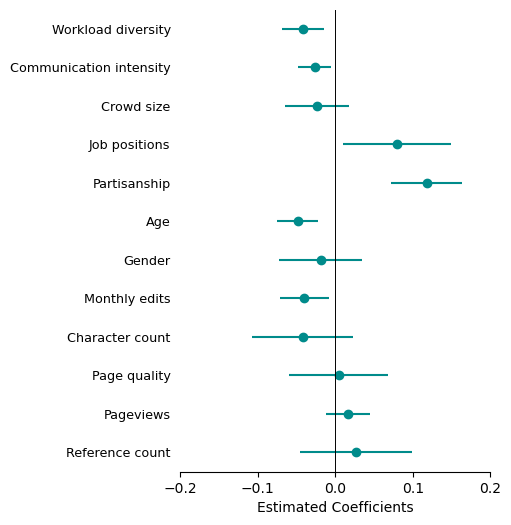

In [60]:
#Define figure, axes, and plot

fig, ax = plt.subplots(figsize=(4, 6))

# Error bars for 95% confidence interval
# Can increase capsize to add whiskers

coef_df.plot(x='varname', y='coef', kind='barh',
             ax=ax, color='none',
             ecolor='darkcyan',
             xerr='err', legend=False)

ax.set_xlabel('Estimated Coefficients')
ax.set_ylabel('')

# Coefficients  s=120,
plt.scatter(x=coef_df['coef'], 
           marker='o',  
           y=pd.np.arange(coef_df.shape[0]), color='darkcyan')
# reset x ticks
plt.xticks(np.arange(-0.2, 0.3, 0.1))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Line to define zero on the y-axis
ax.axvline(x=0, linestyle='-', color='k', linewidth=0.7)

ylabels = ['Reference count', 'Pageviews', 'Page quality', 'Character count', 'Monthly edits',
'Gender', 'Age', 'Partisanship',  'Job positions', 'Crowd size', 'Communication intensity',
'Workload diversity']
ax.yaxis.set_ticks_position('none')
_ = ax.set_yticklabels(ylabels, 
                       rotation=0, fontsize=9.2)

#plt.savefig('.../regressionCoefUpdated.pdf', bbox_inches = 'tight')